# PaleoSTeHM user interface

## Spatiotemporal model of Holocene sea-level change with Gaussian Process (no physical model)

We will use a Gaussian Process model with a global temporal kernel, a regionally linear ST kernel, a regional non-linear ST kernel, a locally non-linear ST kernel and a whitenoise kernel. We can write it down as:

$$
p(f| \Theta_{s},f ) \sim GP(0,k_{combined}(X,X')) \\
k_{combined}(X,X') = k_{global}(t,t') + k_{regionL}(X,X')  + k_{regionNL}(X,X') + k_{localNL}(X,X') + k_{whitenoise}(X,X')$$
where $X$ indicates time and location of each sea-level data, consisting time ($t$) and location ($x$). Each specific kernel can be expressed as: 
$$
k_{global}(t,t') = k_{M_{32}}(t,t')\\
k_{regionL}(X,X') = k_{Linear}(t,t') \cdot k_{RBF}(x,x')\\
k_{regionNL}(X,X') = k_{M_{32}}(t,t') \cdot k_{M_{32}}(x,x')\\
k_{localNL}(X,X') = k_{M_{32}}(t,t') \cdot k_{M_{32}}(x,x')\\
k_{whitenoise}(X,X') = k_{whitenose}(X,X')\\
$$
where $\cdot$ indicates element-wise multiplication. The difference between regional and local non-linear kernel is specified by different choices in kernels and prior distribtuions. 

Here's a notebook for automatic implementation, optimization and visulization of RSL change, codes details are in ```Holocene_SP_analysis.py```.

In [1]:
#load modules
import matplotlib.pyplot as plt
import matplotlib
import torch
import numpy as np
import pandas as pd
import cartopy
import cartopy.crs as ccrs
import sys

sys.path.append('../..')
import PSTHM 
import Holocene_SP_analysis 

#set plotting style
%matplotlib inline
font = {'weight':'normal',
       'size':20}

matplotlib.rc('font',**font)
matplotlib.rcParams['figure.figsize'] = (12, 6)
import warnings
warnings.filterwarnings("ignore")

### Step 1 - loading your sea-level database

Please check ```Data/US_Atlantic_Coast_for_ESTGP.csv``` for data format. 

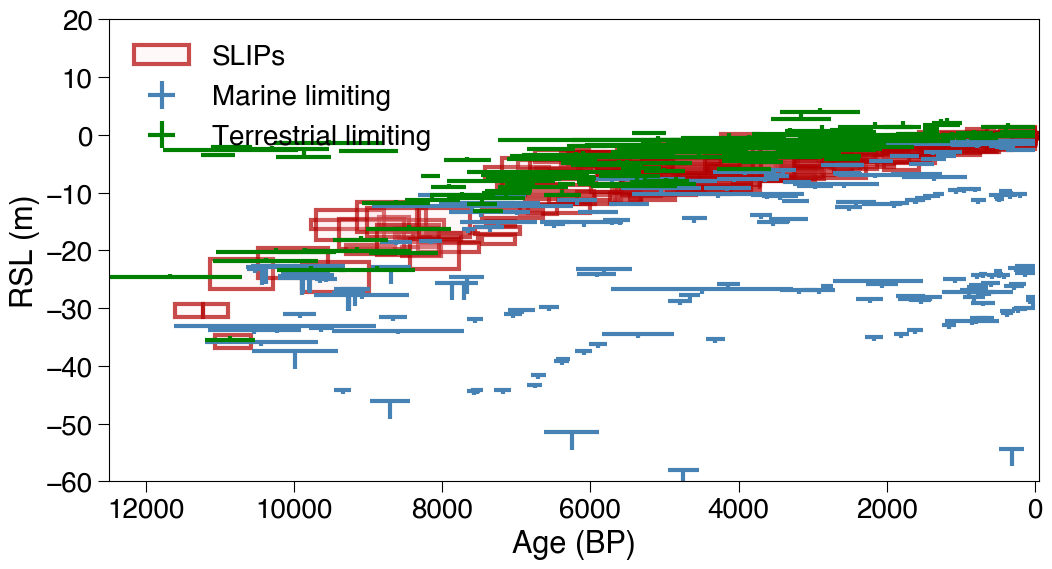

In [2]:
outputs= Holocene_SP_analysis.load_rsl_data('Data/US_Atlantic_Coast_for_ESTGP.csv')
rsl_age, rsl, rsl_sigma,rsl_1sigma_stack, rsl_age_sigma,rsl_age_1sigma_stack, ml_index, tl_index, slip_index, X_all, rsl_region, rsl_region_name, y,rsl_lat,rsl_lon = outputs
ax = plt.subplot(111)
PSTHM.plotting.plot_uncertainty_boxes(rsl_age[slip_index],rsl[slip_index], rsl_age_1sigma_stack[slip_index]*2,rsl_1sigma_stack[slip_index]*2,ax=ax)
PSTHM.plotting.plot_limiting_data(rsl_age[ml_index],rsl[ml_index],rsl_age_1sigma_stack[ml_index]*2,rsl_1sigma_stack[ml_index]*2,marine_limiting=True,ax=ax)
PSTHM.plotting.plot_limiting_data(rsl_age[tl_index],rsl[tl_index],rsl_age_1sigma_stack[tl_index]*2,rsl_sigma[tl_index]*2,marine_limiting=False,ax=ax)
plt.xlim(12500, -50)
plt.ylim(-60, 20)
plt.legend(loc=0)

### Step 2 - loading your sea-level database

Implement and optimize spatiotemporal hierarchical model

In [3]:
gpr = Holocene_SP_analysis.implement_sp_gp_model(X_all, y, rsl_sigma[slip_index], rsl_age_sigma[slip_index],iteration=500)


-----------------------------------
Model implementation complete successfully


  0%|          | 0/500 [00:00<?, ?it/s]

Optimized parameters:                                              Kernel  Optimized Value
0                    global_kernel_lengthscale (yr)     7.310112e+03
1                      global_kernel_variance (m^2)     1.760321e+02
2             regional_linear_kernel_variance (m^2)     1.655304e-07
3   regional_linearl_kernel_spatil_lengthscale (km)     9.904917e+01
4                 regional_nl_kernel_variance (m^2)     1.022432e-02
5               regional_nl_kernel_lengthscale (yr)     1.253755e+03
6       regional_nl_kernel_spatial_lengthscale (km)     3.220782e+03
7                    local_nl_kernel_variance (m^2)     8.545988e-03
8                  local_nl_kernel_lengthscale (yr)     1.375661e+03
9         local_nl_spatial_spatial_lengthscale (km)     6.446553e+01
10              sp_whitenoise_kernel_variance (m^2)     3.324995e-04
11                 whitenoise_kernel_variance (m^2)     9.844879e-05
-----------------------------------
Optimization complete successfully
Optimized 

### Step 3 - visulizing modeled temporal rsl prediction for each region and saving the results


In [4]:

Holocene_SP_analysis.process_rsl_data(rsl_region, rsl_region_name, rsl_lat, rsl_lon, rsl_age, rsl, rsl_age_1sigma_stack, rsl_1sigma_stack, rsl_sigma, slip_index, tl_index, ml_index, gpr, test_age=None)


A total number of 17 figures have been generated and saved to Outputs/Temporal_plots_data/
Temporal analysis data has been successfully saved to Outputs/Temporal_plots_data/output_results.nc


<Figure size 1200x600 with 0 Axes>

<Figure size 5000x2000 with 0 Axes>

<Figure size 5000x2000 with 0 Axes>

<Figure size 5000x2000 with 0 Axes>

<Figure size 5000x2000 with 0 Axes>

<Figure size 5000x2000 with 0 Axes>

<Figure size 5000x2000 with 0 Axes>

<Figure size 5000x2000 with 0 Axes>

<Figure size 5000x2000 with 0 Axes>

<Figure size 5000x2000 with 0 Axes>

<Figure size 5000x2000 with 0 Axes>

<Figure size 5000x2000 with 0 Axes>

<Figure size 5000x2000 with 0 Axes>

<Figure size 5000x2000 with 0 Axes>

<Figure size 5000x2000 with 0 Axes>

<Figure size 5000x2000 with 0 Axes>

<Figure size 5000x2000 with 0 Axes>

<Figure size 5000x2000 with 0 Axes>

### Step 4 - visulizing modeled spatial rsl prediction for each time and saving the results


In [68]:

Holocene_SP_analysis.process_rsl_predictions_and_save(rsl_lat, rsl_lon, gpr, test_time=np.arange(12000, 0, -1000))

Data saved to Outputs/Spatial_plots_data/output_results.nc


<Figure size 5000x2000 with 0 Axes>

<Figure size 5000x2000 with 0 Axes>

<Figure size 5000x2000 with 0 Axes>

<Figure size 5000x2000 with 0 Axes>

<Figure size 5000x2000 with 0 Axes>

<Figure size 5000x2000 with 0 Axes>

<Figure size 5000x2000 with 0 Axes>

<Figure size 5000x2000 with 0 Axes>

<Figure size 5000x2000 with 0 Axes>

<Figure size 5000x2000 with 0 Axes>

<Figure size 5000x2000 with 0 Axes>

<Figure size 5000x2000 with 0 Axes>

### Final Notes

- All figures are saved as ```pdf``` files, you can further modify it with external software like illustrator.
- All output data are saved as ```netcdf``` files,  you can open with [netCDF4](https://unidata.github.io/netcdf4-python/).


If you use this code for publication, please cite the following paper:

```Lin, Y., Kopp, R. E., Reedy, A., Turilli, M., Jha, S., and Ashe, E. L.: PaleoSTeHM v1.0-rc: a modern, scalable spatio-temporal hierarchical modeling framework for paleo-environmental data, EGUsphere [preprint], https://doi.org/10.5194/egusphere-2024-2183, 2024.```